<a href="https://colab.research.google.com/github/CarlosMelchor/lanzones_identification_using_CNN/blob/main/Lanzones_Identification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
#%load_ext tensorboard
import tensorflow as tf
import datetime, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__

'2.9.2'

Original


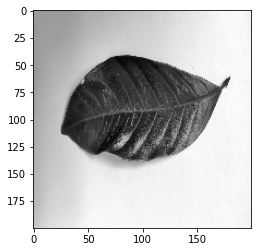

Flipped Original


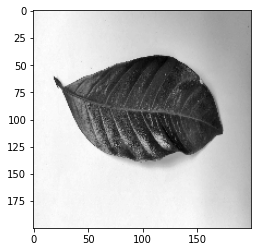

Rotated


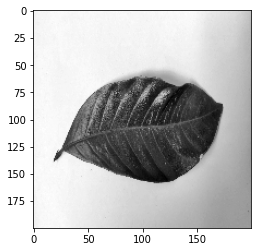

Flipped Rotated


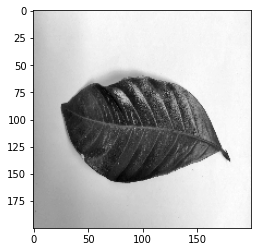

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image, ImageFilter
DATADIR_TRAIN = "/content/drive/MyDrive/datasets/train"
DATADIR_VAL = "/content/drive/MyDrive/datasets/validation"
DATADIR_TEST = "/content/drive/MyDrive/datasets/test"
CATEGORIES = ["Lanzones_Duko","Lanzones_Native"]
IMG_SIZE = 200
for category in CATEGORIES:
  path = os.path.join(DATADIR_TRAIN, category)
  for img in os.listdir(path)[:3]:
    train_img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    dims = train_img_array.shape
    height = dims[0]
    width = dims[1]
    if height > width:
      train_img_array = cv2.rotate(train_img_array, cv2.ROTATE_90_CLOCKWISE)
    train_img_array = cv2.resize(train_img_array, (IMG_SIZE, IMG_SIZE))
    flip_train_img_array = cv2.flip(train_img_array,1)
    rotate_train_img_array = cv2.rotate(train_img_array, cv2.ROTATE_180)
    flip_rotate_train_img_array = cv2.flip(rotate_train_img_array,1)
    noise_train_img_array = cv2.blur(train_img_array,(5,5))
print("Original")
plt.imshow(train_img_array, cmap="gray")
plt.show()
print("Flipped Original")
plt.imshow(flip_train_img_array, cmap="gray")
plt.show()
print("Rotated")
plt.imshow(rotate_train_img_array, cmap="gray")
plt.show()
print("Flipped Rotated")
plt.imshow(flip_rotate_train_img_array, cmap="gray")
plt.show()

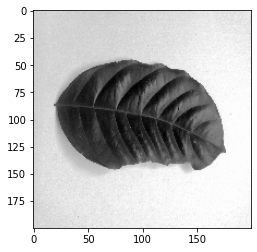

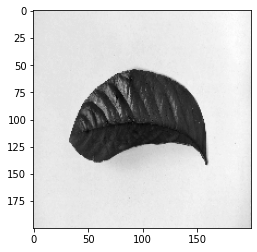

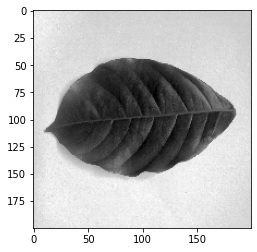

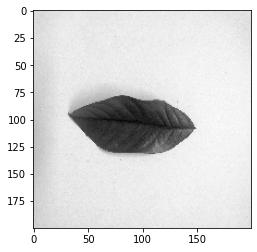

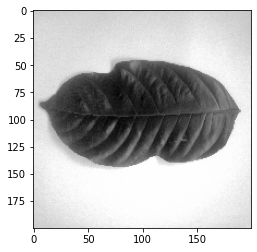

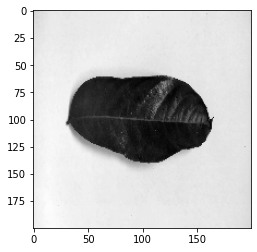

In [ ]:
training_data=[]
validation_data=[]
testing_data=[]
def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR_TRAIN, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      train_img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      dims = train_img_array.shape
      height = dims[0]
      width = dims[1]
      if height > width:
        train_img_array = cv2.rotate(train_img_array, cv2.ROTATE_90_CLOCKWISE)
      train_new_array = cv2.resize(train_img_array, (IMG_SIZE, IMG_SIZE))#original
      flip_train_new_array = cv2.flip(train_new_array,1)#flipped original
      rotate_train_new_array = cv2.rotate(train_new_array, cv2.ROTATE_180)#rotated
      flip_rotate_train_new_array = cv2.flip(rotate_train_new_array,1)#flipped rotated
      training_data.append([train_new_array, class_num])
      training_data.append([flip_train_new_array, class_num])
      training_data.append([rotate_train_new_array, class_num])
      training_data.append([flip_rotate_train_new_array, class_num])
    plt.imshow(train_new_array, cmap='gray')
    plt.show()

def create_validation_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR_VAL, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      val_img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      dims = val_img_array.shape
      height = dims[0]
      width = dims[1]
      if height > width:
        val_img_array = cv2.rotate(val_img_array, cv2.ROTATE_90_CLOCKWISE)
      val_new_array = cv2.resize(val_img_array, (IMG_SIZE, IMG_SIZE))
      validation_data.append([val_new_array, class_num])
    plt.imshow(val_new_array, cmap='gray')
    plt.show()

def create_test_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR_TEST, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      test_img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      dims = test_img_array.shape
      height = dims[0]
      width = dims[1]
      if height > width:
        test_img_array = cv2.rotate(test_img_array, cv2.ROTATE_90_CLOCKWISE)
      test_new_array = cv2.resize(test_img_array, (IMG_SIZE, IMG_SIZE))
      testing_data.append([test_new_array, class_num])
    plt.imshow(test_new_array, cmap='gray')
    plt.show()

create_training_data()
create_validation_data()
create_test_data()

In [ ]:
import random
print("Number of Training Data",len(training_data))
print("Number of Validation Data",len(validation_data))
print("Number of Testing Data",len(testing_data),"\n")
random.shuffle(training_data)
random.shuffle(validation_data)
random.shuffle(testing_data)
for sample in training_data[:5]:
  print(sample[1])
print("\n")
for sample in validation_data[:5]:
  print(sample[1])
print("\n")
for sample in testing_data[:5]:
  print(sample[1])

Number of Training Data 648
Number of Validation Data 162
Number of Testing Data 108 

1
1
0
0
0


1
0
1
0
1


0
0
1
1
1


In [ ]:
X_train=[]
y_train=[]
X_val=[]
y_val=[]
X_test=[]
y_test=[]
for features, label in training_data:
  X_train.append(features)
  y_train.append(label)

X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

for features, label in validation_data:
  X_val.append(features)
  y_val.append(label)

X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

for features, label in testing_data:
  X_test.append(features)
  y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

In [ ]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

model = Sequential()
#1st layer
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#2nd layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#3rd layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#4th layer
model.add(Flatten())
model.add(Dense(64))
#output layer
model.add(Dropout(0.65))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
  )
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 32)      320       
                                                                 
 activation_16 (Activation)  (None, 198, 198, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 activation_17 (Activation)  (None, 97, 97, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                 

In [ ]:
r = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
21/21 [==============================] - 44s 2s/step - loss: 0.6714 - accuracy: 0.6188 - val_loss: 0.7084 - val_accuracy: 0.4877
Epoch 2/20
21/21 [==============================] - 45s 2s/step - loss: 0.5513 - accuracy: 0.7361 - val_loss: 0.6018 - val_accuracy: 0.6975
Epoch 3/20
21/21 [==============================] - 45s 2s/step - loss: 0.4662 - accuracy: 0.7917 - val_loss: 0.4790 - val_accuracy: 0.7778
Epoch 4/20
21/21 [==============================] - 45s 2s/step - loss: 0.3936 - accuracy: 0.8549 - val_loss: 0.4405 - val_accuracy: 0.8086
Epoch 5/20
21/21 [==============================] - 45s 2s/step - loss: 0.3504 - accuracy: 0.8441 - val_loss: 0.3610 - val_accuracy: 0.8642
Epoch 6/20
21/21 [==============================] - 45s 2s/step - loss: 0.2439 - accuracy: 0.9043 - val_loss: 0.2710 - val_accuracy: 0.8951
Epoch 7/20
21/21 [==============================] - 45s 2s/step - loss: 0.1980 - accuracy: 0.9074 - val_loss: 0.2259 - val_accuracy: 0.9074
Epoch 8/20
21/21 [==

In [ ]:
#Evaluate
score = model.evaluate(X_val, y_val, verbose = 0)
print('Trained Model loss:', score[0])
print('Trained Model accuracy:', score[1])

Trained Model loss: 0.1604064553976059
Trained Model accuracy: 0.9259259104728699


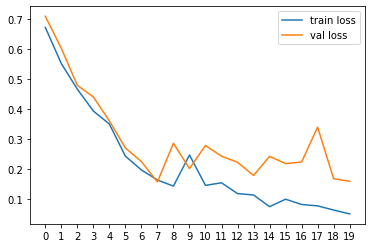

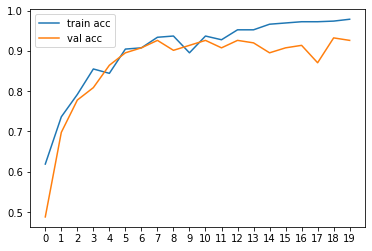

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()
plt.savefig('LossVal_loss')

print("\n")
# Plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.show()
plt.savefig('AccVal_acc')
print("\n")

In [ ]:
#Evaluate
test_score = model.evaluate(X_test, y_test, verbose = 0)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Test loss: 0.22151097655296326
Test accuracy: 0.9166666865348816


In [ ]:
from sklearn.metrics import classification_report
#Predict

T=0.5
y_pred = model.predict(X_test)
y_pred_bool = y_pred>=T
print("\n")
print(classification_report(y_test, y_pred_bool))

4/4 [==============================] - 2s 407ms/step


              precision    recall  f1-score   support

           0       0.88      0.96      0.92        54
           1       0.96      0.87      0.91        54

    accuracy                           0.92       108
   macro avg       0.92      0.92      0.92       108
weighted avg       0.92      0.92      0.92       108



In [ ]:
fp = tf.keras.metrics.FalsePositives()
fp.update_state(y_test, y_pred)
fp = fp.result().numpy()

fn = tf.keras.metrics.FalseNegatives()
fn.update_state(y_test, y_pred)
fn = fn.result().numpy()

tn = tf.keras.metrics.TrueNegatives()
tn.update_state(y_test, y_pred)
tn = tn.result().numpy()

tp = tf.keras.metrics.TruePositives()
tp.update_state(y_test, y_pred)
tp = tp.result().numpy()
print('Correctly classified: ', tp+tn)
print('Incorrectly classified: ', fn+fp)
print('True Predicted Duko: ', tn)
print('False Predicted Duko: ', fn)
print('True Predicted Native: ', tp)
print('False Predicted Native: ', fp)

Correctly classified:  99.0
Incorrectly classified:  9.0
True Predicted Duko:  52.0
False Predicted Duko:  7.0
True Predicted Native:  47.0
False Predicted Native:  2.0
